In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import os
from scipy import stats, integrate
import matplotlib.pyplot as plt
from sample_seeds import read_warriner_ratings

In [12]:
import seaborn as sns
sns.set(color_codes=True)
%pwd

'/home/jyuwei/code/WordEmbedding-SubCulture/src/epa_expansion'

In [13]:
os.chdir('..')
%pwd
warriner = read_warriner_ratings()

In [14]:
with open('../result/epa_expansion/nn_result_github_all', 'r') as fp:
    github = json.load(fp)
with open('../result/epa_expansion/nn_result_twitter_all', 'r') as fp:
    twitter = json.load(fp)

In [15]:
def get_tokenset(words_list):
    from nltk.corpus import wordnet as wn 
    words_list_pos = {
        wn.VERB: [],
        wn.NOUN: [],
        wn.ADV: [],
        wn.ADJ: []
    }
    
    for word in words_list:
        for pos in words_list_pos.keys():
            if word in set(w.name().split('.', 1)[0] for w in wn.synsets(word, pos=pos)):
                words_list_pos[pos].append(word)

    return words_list_pos


def tokenset_comp(words_list_pos, bins, baseline=False):
    for pos in words_list_pos.keys():
        tokenlist = words_list_pos[pos]
        github_list = np.array([github[t] for t in set(tokenlist) & set(github.keys())])
        twitter_list = np.array([twitter[t] for t in set(tokenlist) & set(twitter.keys())])
        warriner_list = np.array([warriner[t] for t in set(tokenlist) & set(warriner.keys())])
        for axis in range(0, 3):
            plt.figure()
            plt.title('%s %s' % (pos, axis))
            sns.distplot(github_list[:, axis], color='r', bins=bins)
            sns.distplot(twitter_list[:, axis], color='b', bins=bins)
            if baseline:
                sns.distplot(warriner_list[:, axis], color='g', bins=1000)
        print('===== %s %s =====' % (pos, len(tokenlist)))
        print(np.mean(github_list, axis=0))
        print(np.mean(np.abs(github_list), axis=0))
        print(np.std(github_list, axis=0))

        print(np.mean(twitter_list, axis=0))
        print(np.mean(np.abs(twitter_list), axis=0))
        print(np.std(twitter_list, axis=0))
        
        print(np.mean(warriner_list, axis=0))
        print(np.mean(np.abs(warriner_list), axis=0))
        print(np.std(warriner_list, axis=0))

In [16]:
%pwd

'/home/jyuwei/code/WordEmbedding-SubCulture/src'

In [17]:
words_list_pos = get_tokenset(set(github.keys()) & set(twitter.keys()) & set(warriner.keys()))

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


===== v 2893 =====
[ 0.35538799  0.77974884 -1.09046073]
[0.4810972  0.80503448 1.09485914]
[0.47317827 0.37473337 0.27963638]
[ 0.26507969  0.68775995 -1.05870313]
[0.57479106 0.75531797 1.07718037]
[0.67594531 0.4985761  0.40136177]
[ 0.34648226  0.8184798  -0.81545667]
[1.13817943 1.21520524 1.22044884]
[1.37351916 1.20885753 1.19941854]
===== r 88 =====
[ 0.34469813  0.72069814 -1.1019277 ]
[0.5772719  0.78442839 1.1019277 ]
[0.65149742 0.4757574  0.35248399]
[ 0.22675479  0.59894352 -1.07760611]
[0.56517371 0.71007353 1.11356183]
[0.70216127 0.53442637 0.44911437]
[ 0.54159997  0.68267685 -1.10294463]
[0.99636114 1.05253215 1.50506315]
[1.18908963 1.10571315 1.3757814 ]
===== a 2071 =====
[ 0.26609104  0.71448075 -1.06775077]
[0.47112272 0.75148363 1.07034794]
[0.53446922 0.40920285 0.26963217]
[ 0.19705135  0.64088181 -0.96501624]
[0.56512016 0.72321153 0.98006144]
[0.70506098 0.51557603 0.37993304]
[ 0.31982602  0.64345013 -0.673708  ]
[1.37871192 1.28513774 1.16089525]
[1.62740

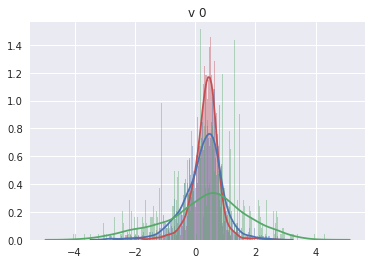

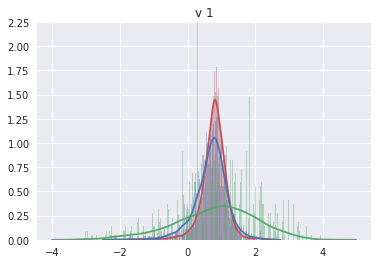

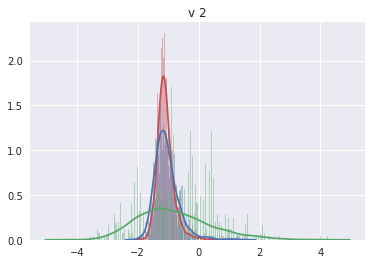

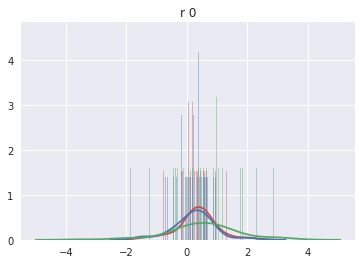

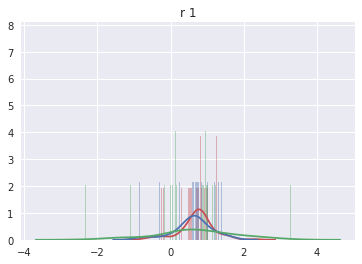

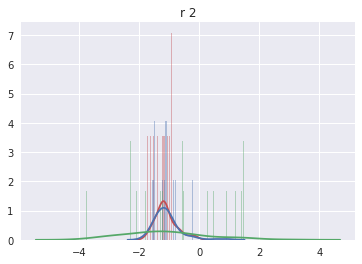

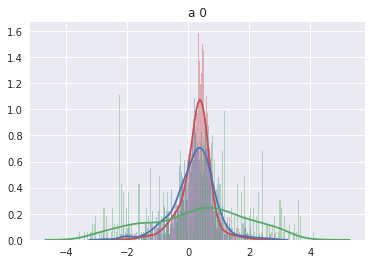

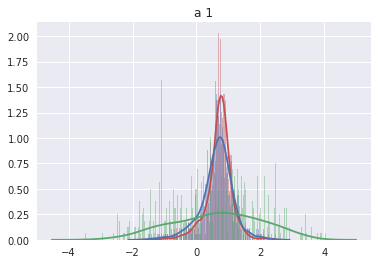

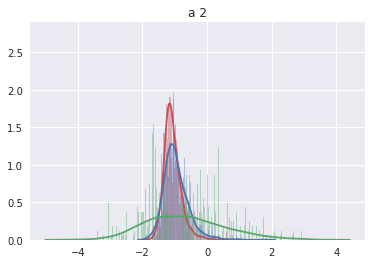

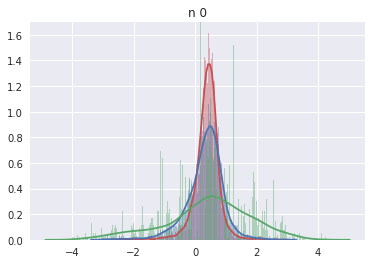

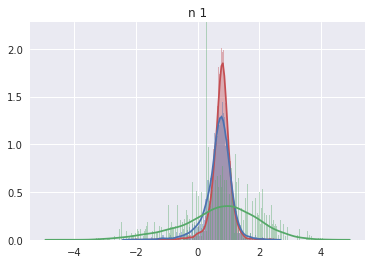

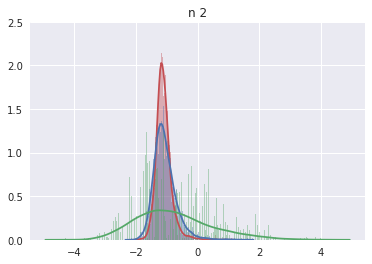

In [18]:
tokenset_comp(words_list_pos, 500, True)

In [19]:
%ls epa_expansion/*.txt

epa_expansion/action.txt  epa_expansion/emotions.txt


In [20]:
with open('epa_expansion/emotions.txt') as fp:
    emotions = set([line.rstrip('\n').lower() for line in fp.readlines()])
emotions = list(emotions & set(github.keys()) & set(twitter.keys()))
print(emotions)
print(len(emotions))

['scared', 'frustrated', 'attraction', 'shocked', 'curious', 'stunned', 'satisfied', 'receptive', 'proud', 'suspicious', 'confident', 'excited', 'isolated', 'sympathy', 'exasperated', 'dreading', 'indifferent', 'uncomfortable', 'amazed', 'relaxed', 'depressed', 'pity', 'interested', 'restless', 'confused', 'relieved', 'hopeless', 'disappointed', 'safe', 'helpless', 'fearful', 'afraid', 'rejected', 'eager', 'lonely', 'concern', 'defeated', 'disturbed', 'bitter', 'numb', 'hurt', 'lust', 'happy', 'cautious', 'exhausted', 'insulted', 'cheerful', 'anticipating', 'nervous', 'envious', 'insecure', 'optimistic', 'trust', 'fondness', 'content', 'sad', 'grumpy', 'irritated', 'intrigued', 'dismayed', 'guilty', 'awkward', 'inferior', 'jealous', 'delighted', 'hostile', 'caring', 'worried', 'amused', 'panicked', 'angry', 'hopeful', 'annoyed', 'absorbed', 'trusting', 'bored', 'calm', 'embarrassed', 'brave', 'comfortable', 'liking', 'anxious', 'alarmed', 'sorrow', 'love', 'weary', 'horrified', 'preocc

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


===== emotions 101 =====
[ 0.14041086  0.68414302 -0.89256389]
[0.50305957 0.71244642 0.90592686]
[0.69788528 0.50417974 0.32864404]
[-0.12428517  0.44329822 -0.68751902]
[0.87841203 0.73096905 0.7385532 ]
[1.11492033 0.80231805 0.46125309]
[-0.24720488  0.23469371 -0.13893376]
[2.43929037 1.70737901 1.11147011]
[2.54120346 1.97797472 1.42560296]


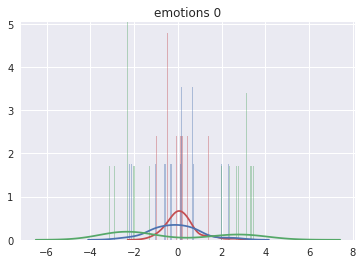

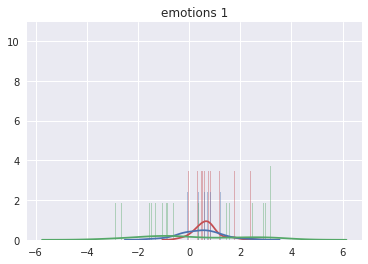

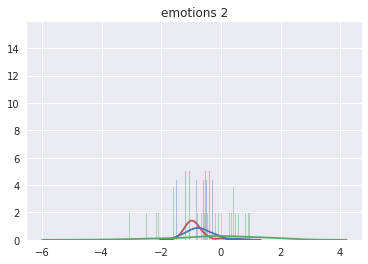

In [22]:
tokenset_comp({'emotions': emotions}, 1000, True)

In [25]:
with open('epa_expansion/action.txt') as fp:
    actions = set([line.rstrip('\n').lower() for line in fp.readlines()])
actions = list(actions & set(github.keys()) & set(twitter.keys()))
print(actions)
print(len(actions))

['devise', 'transition', 'charge', 'differentiate', 'construct', 'duplicate', 'host', 'commissioned', 'write', 'debate', 'enhance', 'aid', 'greet', 'contact', 'conclude', 'prioritize', 'boost', 'visualize', 'upload', 'speak', 'reinforce', 'divert', 'respond', 'conserve', 'forecast', 'adhere', 'repair', 'polish', 'drive', 'sketch', 'penetrate', 'customize', 'whittle', 'join', 'experience', 'convince', 'direct', 'sanction', 'nullify', 'license', 'build', 'travel', 'share', 'conceive', 'script', 'divide', 'gauge', 'regain', 'mitigate', 'enlist', 'index', 'fashion', 'establish', 'uphold', 'net', 'settle', 'introduce', 'aim', 'plant', 'target', 'assume', 'integrate', 'decentralize', 'supervise', 'connect', 'accommodate', 'illustrate', 'shape', 'wage', 'advocate', 'teach', 'catalog', 'disclose', 'command', 'channel', 'register', 'paraphrase', 'tighten', 'graph', 'resolve', 'achieve', 'hire', 'repeat', 'scope', 'bargain', 'compute', 'regulate', 'name', 'increase', 'improvise', 'suggest', 'est

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


===== actions 619 =====
[ 0.47371219  0.97756542 -1.15524163]
[0.51995081 0.98314017 1.15582691]
[0.36839912 0.31483506 0.22741143]
[ 0.4178102   0.91660967 -1.1122721 ]
[0.57569008 0.92971013 1.11468313]
[0.55135178 0.41385526 0.32825221]
[ 0.84402709  1.46945338 -0.95892879]
[1.09100624 1.5797675  1.21447745]
[1.03301494 1.02482073 1.06085828]


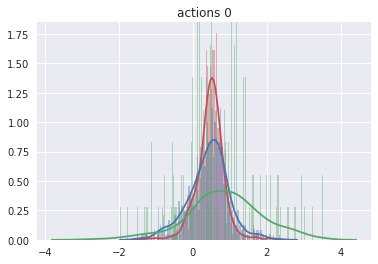

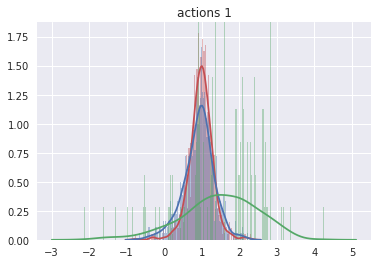

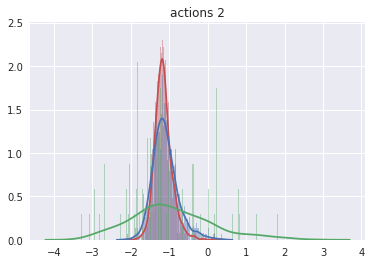

In [24]:
tokenset_comp({'actions': actions}, 100, True)